## Understanding PHATE visualization

In this part of the class we need access to csv files. The cell before will clone the github repository into your session to give you access. 

You can see available files by clicking the folder icon in the left side menu. 

Alternatively you can upload files directly from your drive to the session sotrage by using the upload button (in the Files tab).

In [1]:
!git clone https://github.com/fjorka/Pitt_SBII_2023.git

Cloning into 'Pitt_SBII_2023'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), 29.11 MiB | 9.08 MiB/s, done.


The cell below installs and imports necessary libraries that we are going to use.

In [2]:
!pip install phate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.6/417.6 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [9]:
import pandas as pd
import phate
import matplotlib.pyplot as plt
import seaborn as sn

### Example 1

Import data into a table and display it.

In [4]:
df = pd.read_csv('./Pitt_SBII_2023/single_cells_test_00.csv',index_col=0)
df

,a,b,c
159,-0.008561,0.093510,0.041033
358,-0.083219,1.038420,0.076618
491,0.042282,1.993137,0.837763
137,-0.177639,0.052522,0.029232
2,-0.165534,-0.004348,1.128730
...,...,...,...
970,0.058585,-0.120010,1.180020
840,1.369936,-0.122633,1.944515
482,0.070359,1.822856,0.976923
18,-0.040319,0.219070,0.980914


Visualize the data as a 3D scatter plot.

Text(0.5, 0, 'a')

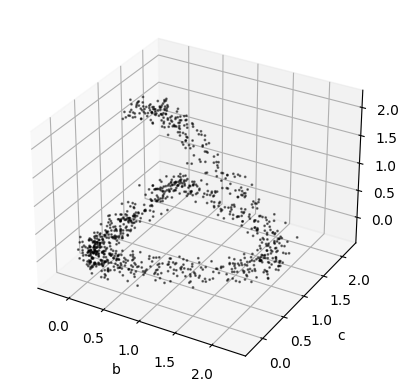

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df.b, df.c, df.a,alpha = 0.5, s =1,c = 'black')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('a')

Use Phate to find 2D projection of the data.

In [6]:
phate_operator = phate.PHATE(n_components=2)

phate_operator.set_params(gamma=0, t=40)

phate_res = phate_operator.fit_transform(df)

Calculating PHATE...
  Running PHATE on 1000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.91 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.40 seconds.
Calculated PHATE in 4.41 seconds.


<Axes: xlabel='phate1', ylabel='phate2'>

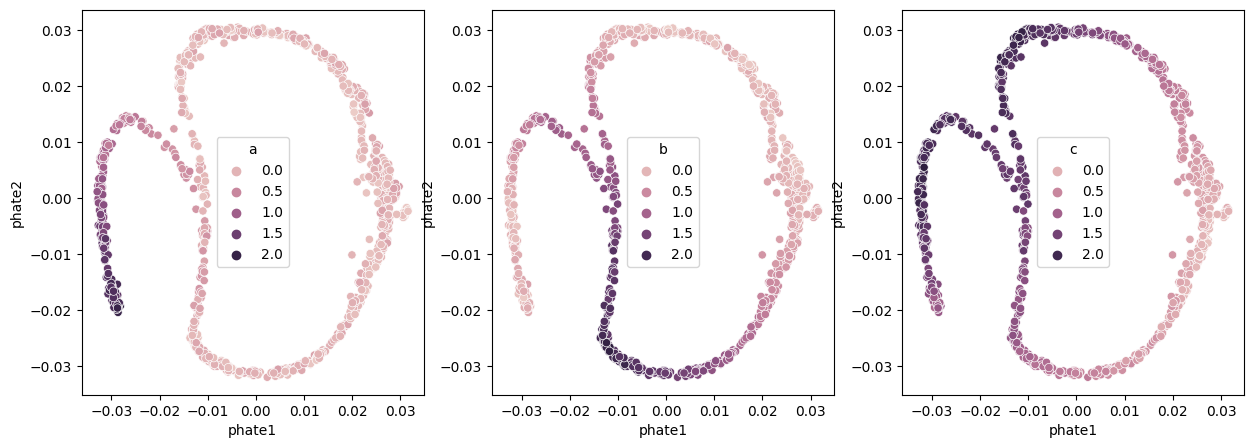

In [11]:
df_all = df
df_all['phate1'] = phate_res[:,0]
df_all['phate2'] = phate_res[:,1]

fig,axes = plt.subplots(1,3,figsize=(15,5))
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='a',ax = axes[0])
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='b',ax = axes[1])
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='c',ax = axes[2])

### Example 2

Import data into a table and display it.

In [13]:
df = pd.read_csv('./Pitt_SBII_2023/single_cells_test_01.csv',index_col=0)
df

,a,b,c,d
243,-0.293746,0.253653,0.001238,0.221941
704,0.884980,0.188295,1.894767,1.453192
161,0.077912,0.078678,0.019611,0.057563
220,-0.050685,0.184665,0.143363,0.317969
147,-0.034099,-0.054350,0.314783,0.183513
...,...,...,...,...
363,0.148877,1.060149,0.171598,0.732668
595,0.400724,1.402565,1.553489,1.191666
63,-0.075185,0.025365,0.588162,0.067732
633,-0.119105,1.062156,1.780260,1.409064


Visualize the data as a 3D scatter plot.

Text(0.5, 0, 'c')

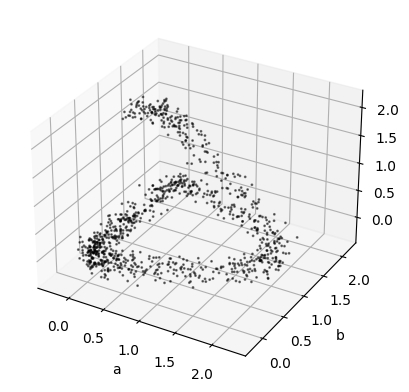

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df.b, df.c, df.a,alpha = 0.5, s =1,c = 'black')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('a')

Text(0.5, 0, 'c')

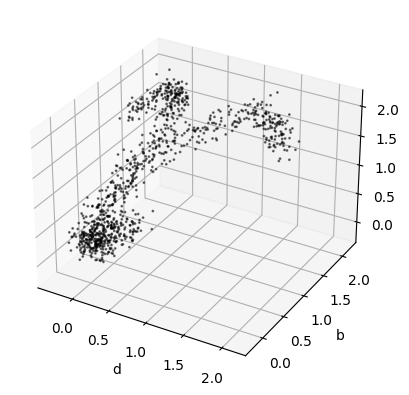

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df.a, df.c, df.d,alpha = 0.5, s =1,c = 'black')

ax.set_xlabel('a')
ax.set_ylabel('c')
ax.set_zlabel('d')

Use Phate to find 2D visualization of the data.

In [21]:
phate_operator = phate.PHATE(n_components=2)

phate_operator.set_params(gamma=0, t=40)

phate_res = phate_operator.fit_transform(df)

Calculating PHATE...
  Running PHATE on 1000 observations and 4 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.65 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.99 seconds.
Calculated PHATE in 6.76 seconds.


<Axes: xlabel='phate1', ylabel='phate2'>

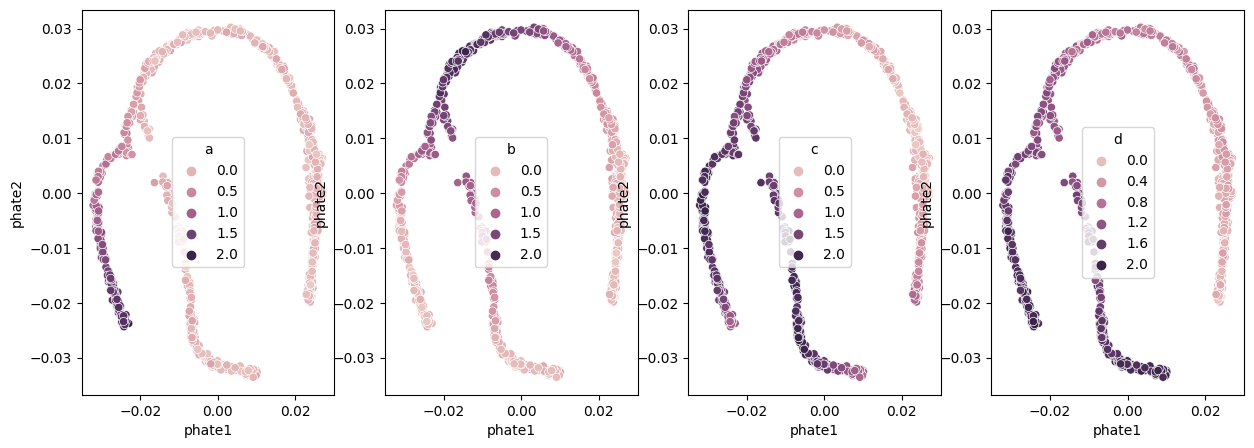

In [23]:
df_all = df
df_all['phate1'] = phate_res[:,0]
df_all['phate2'] = phate_res[:,1]

fig,axes = plt.subplots(1,4,figsize=(15,5))
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='a',ax = axes[0])
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='b',ax = axes[1])
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='c',ax = axes[2])
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='d',ax = axes[3])

### Example 3

Import data into a table and display it.

In [25]:
df = pd.read_csv('./Pitt_SBII_2023/single_cells_test_02.csv',index_col=0)
df

,a,b,c
571,0.126337,1.165655,1.337462
958,0.888049,1.019911,1.146540
904,1.021700,1.110353,1.502939
270,1.223620,1.052114,-0.079947
12,1.000708,0.970324,0.831354
...,...,...,...
66,0.975085,0.881188,0.705416
579,0.327903,0.929357,1.417694
816,1.048033,1.002363,2.062302
818,1.047231,1.024136,2.036576


Visualize the data as a 3D scatter plot.

Text(0.5, 0, 'c')

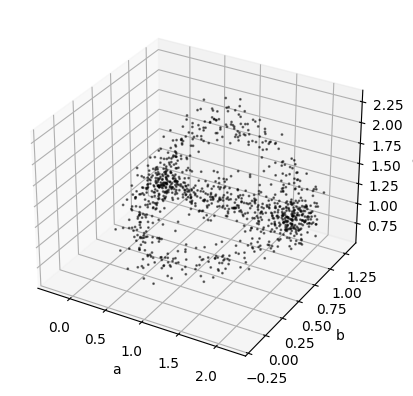

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df.c, df.a, df.b,alpha = 0.5, s =1,c = 'black')

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')

Use Phate to find 2D visualization of the data.

In [30]:
phate_operator = phate.PHATE(n_components=2)

phate_operator.set_params(gamma=0, t=40)

phate_res = phate_operator.fit_transform(df)

Calculating PHATE...
  Running PHATE on 1000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.53 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.47 seconds.
Calculated PHATE in 2.07 seconds.


<Axes: xlabel='phate1', ylabel='phate2'>

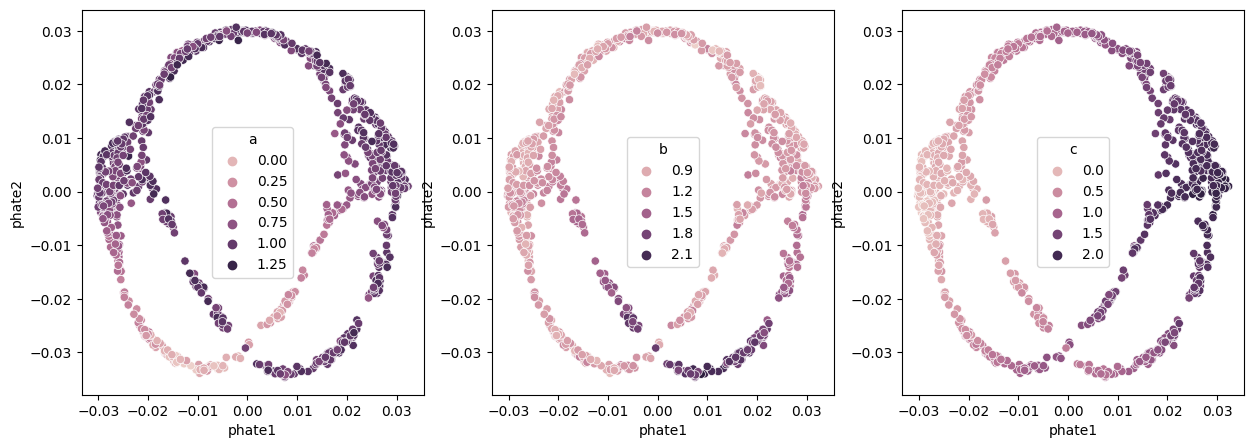

In [31]:
df_all = df
df_all['phate1'] = phate_res[:,0]
df_all['phate2'] = phate_res[:,1]

fig,axes = plt.subplots(1,3,figsize=(15,5))
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='a',ax = axes[0])
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='b',ax = axes[1])
sn.scatterplot(data = df_all, x = 'phate1',y = 'phate2',hue='c',ax = axes[2])